# Алгоритм градиентного бустинга. LightGBM, Catboost, XGBoost.

#### Содержание
1. Напоминание о variance and bias tradeoff.
2. Напоминание о градиентном спуске.
3. Один в поле не воин.
4. Градиентный бустинг для регрессии.
5. Градиентный бустинг для классификации.
6. Самые изветсные библиотеки, реализующие градиентный бустинг.

## variance and bias tradeoff

***bias (смещение)*** - разница между целевой переменной и предскзаниями нашей модели.
***
***variance (дисперсия случайной величины)*** - математическое ожидание квадрата отклонения этой случайной величины от ее математического ожидания.
***
***Диллема смещения-дисперсии*** является центральной проблемой в обучении с учителем. Суть: выбираемая модель должна, с одной стороны, точно уловить все закономерности в обучающих данных, а с другой стороны - обобщить закономерности на неизвестные данные.

## Один в поле не воин

***Ансамбль*** - это комбинация нескольких моделей машинного обучения, которые, работая вместе, выдают более точные предсказания.
Классификация ансамблей:
- Bagging - техника, в которой мы строим независимые друг от друга модели (но не разные, то есть, например, все модели являются только логистической регрессией или только гардиентным бустингом), комбинируем их и обучаем на разных подвыборках данных, тем самым обеспечивая различие моделей между собой, а затем используем некоторую модель усреднения (например, взвешенное среднее, голосование большинства или нормальное среднее). Random Forest - пример Bagging'а. За счет использования множества некореллирующих моделей для построения ансамбля мы добиваемя уменьшения variance.
- Stacking - техника построения ансамблей, в которой применяются модели, различающиеся между собой (на этот раз могут применяться модели разных классов). Эти модели обучаются на тренировочном датасете. Затем добовалятся еще одна модель (мета-модель), обучающаяся на предсказаниях алгоритмов обученных ранее. Таким образом, последняя модель "стакается" поверх других моделей, отсюда и названия данной техники. 
- Boostring - техника построения ансамблей, в которой модели построены не независимо, а последовательно. Главная идея: следующая модель будет учиться на ошибках прошлого. Таким образом требуется меньше времени для того, чтобы добраться до реального ответа. Стоит отметить, что это также может означать, что бустинговые модели могут быстро переобучатсья, следовательно, нам нужно с осторожностью выбирать момент остановки обучения.

## Градиентный спуск

***Градиентный спуск*** - метод нахождения минимального значения функции потерь. 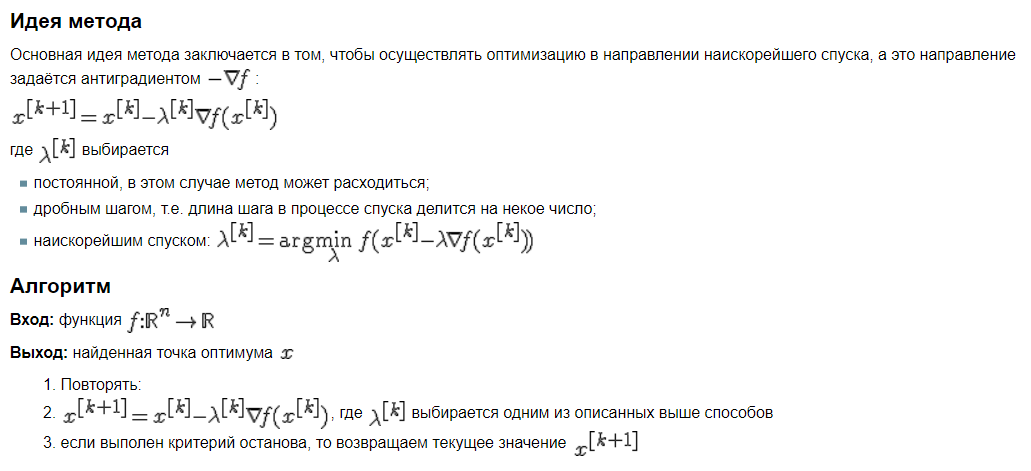

## Что такое градиентный бустинг
***Градиентный бустинг*** - это техника машинного обучения для задач классификации и регрессии, которая строит модель предскзаания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений.

## Градиентный бустинг для задачи регрессии

Разберем градиентный бустинг для задач регрессии на маленьком примере. Сначала сделаем highlevel обзор, а позже погрузимся в не очень сложную математику. Разбирать будем на примере датасета, приведенного ниже.

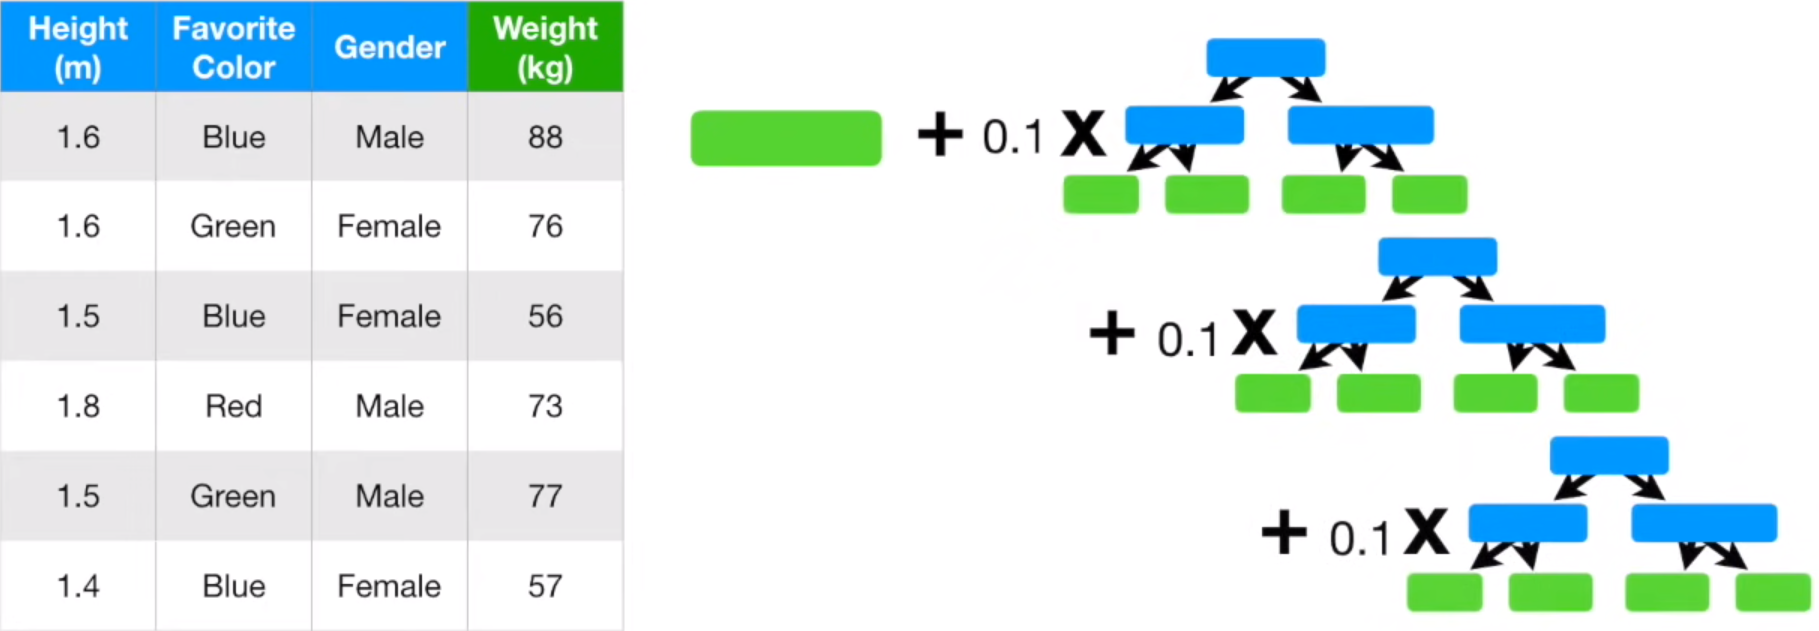

Итак, что же происходит внутри этого "пресловутого" градиентного бустинга?
***
Как понятно из названия, этот алгоритм представляет собой ансамбль, в которой каждая следующая слабая модель обучалась на ошибках предыдущей. Сразу следует отметить, что в данном алгоритме в качестве слабых моделей могут применяться различные алгоритмы машинного обучения, как правило это деревья решений.
***
Для упрощения примера будем рассматривать деревья решений с максимальным количеством листьев 4 (количество листьев можно менять - это гиперпараметр).

***Шаги обучения градиентного бустинга***:
1. Считаем среднее значение по всем таргетам. (это наша отправная точка)
2. Итерационная часть: <br>
    2.1 Принимаем это среднее значение за наше предсказание и вычисляем ошибки.<br>
    2.2 "Добавляем в наш датасет колокнку с ошибками." <br>
    2.3 Строим новое дерево, опираясь на признаки height, favourite color, gender для предсказания ошибок предыдущей модели.<br>
    
В этом примере ошибка равна разности таргета и предсказанного значения. Мы будем это называть псевдо разностью. Почему псевдо? Потому что, на самом деле, ошибка не всегда может оказаться разностью (это зависит от выбора лосс функции, об этом речь пойдет в части с математикой).

<div>
    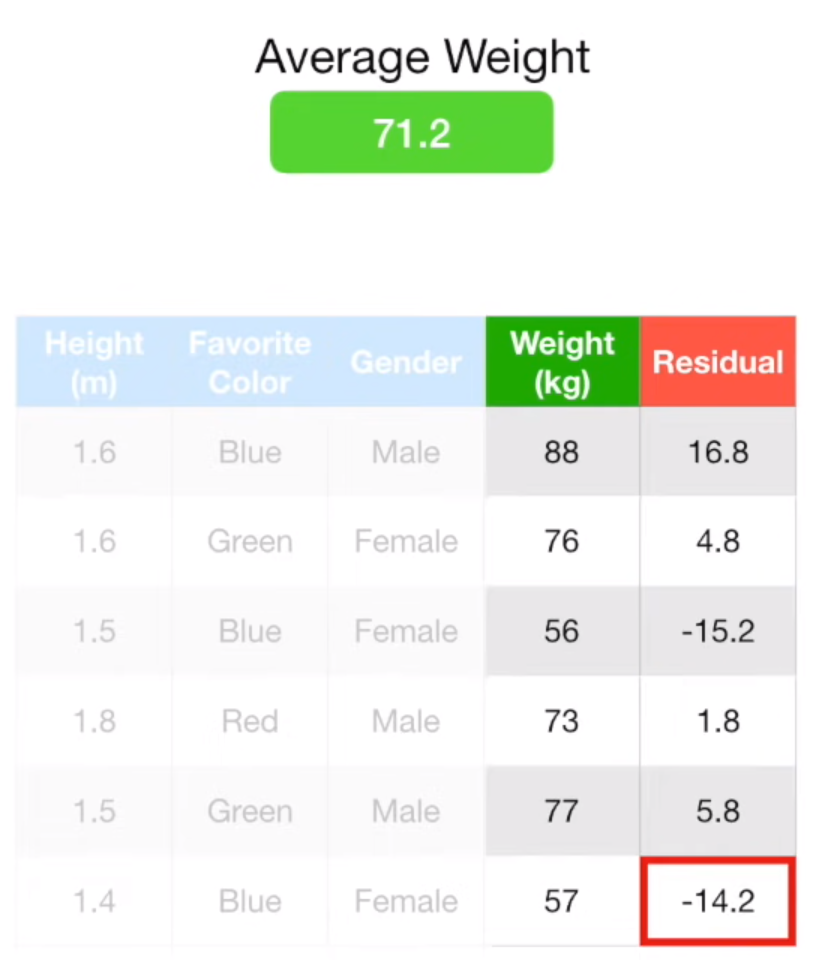 
</div>
<div>
    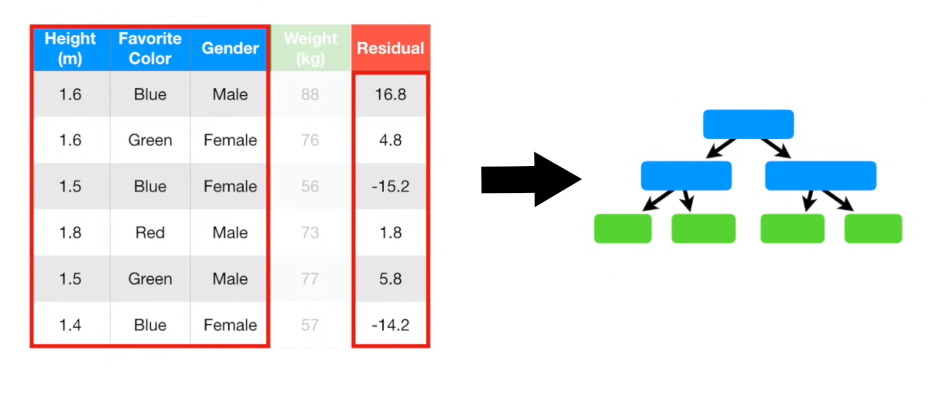
</div>

<div> 
    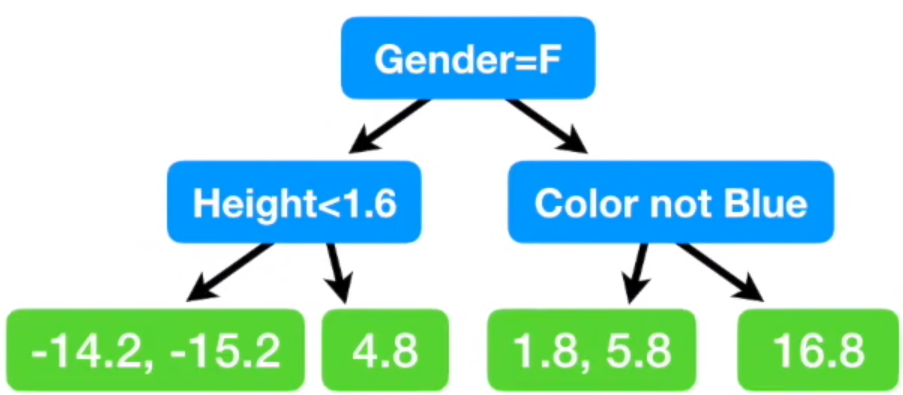
</div>

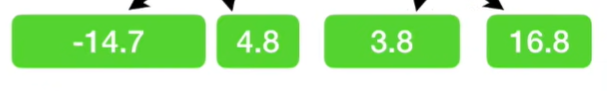

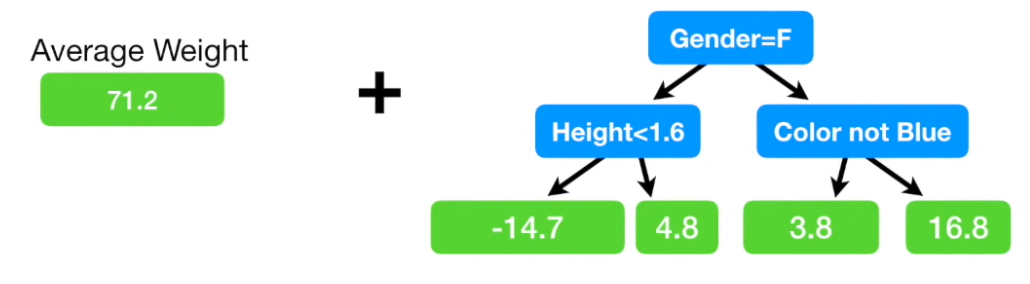

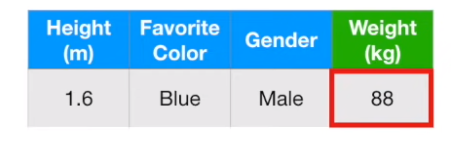
Если мы возьмем сэмпл из тренировочного датасета и пропустим через нашу модельку, то получим результат 88, что в точности совпадает с правильным значением. Хорошо ли это?

Нет. Наша модель переобучилась на обучающих данных. Другими словами, у нас очень маленький bias, но скорее всего большой variance. То есть, наша модель увидев тестовые данные может предсказать совсем неправильные значения.

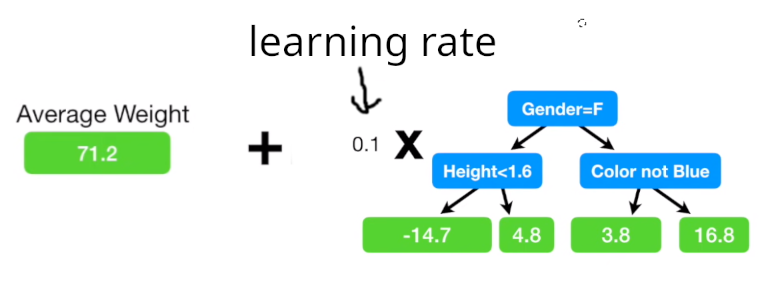
Это проблема решается добавлением learning rate, который помогает масштабировать вклад новой модели. Как правило, learning rate принимает значения между 0 и 1. При других значениях модель либо переобучиться, либо даже не сможет сойтись.

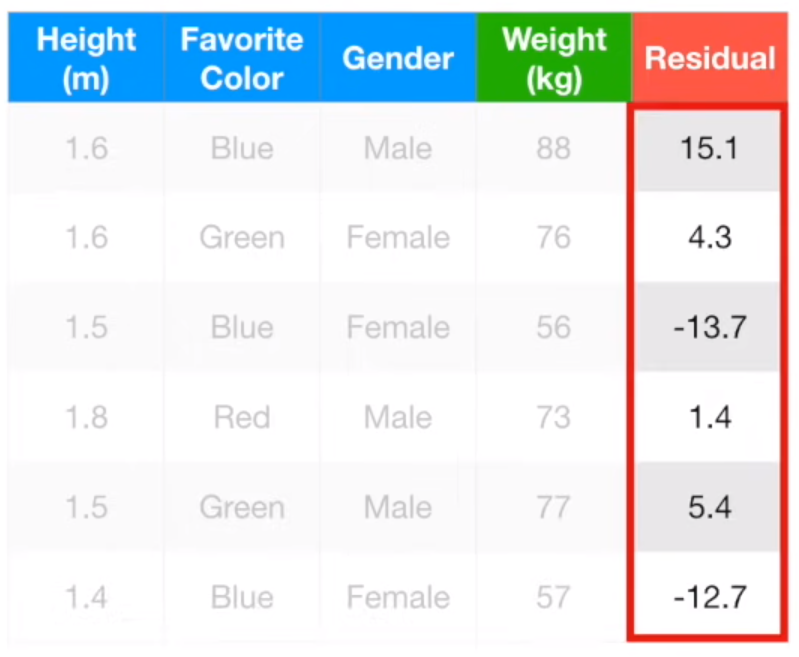

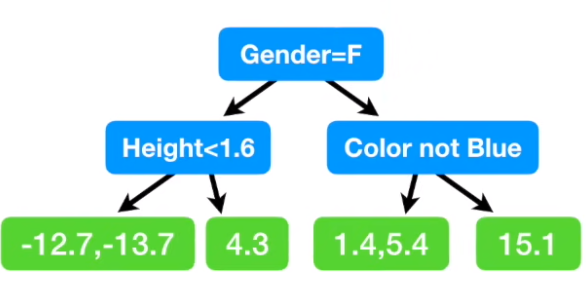

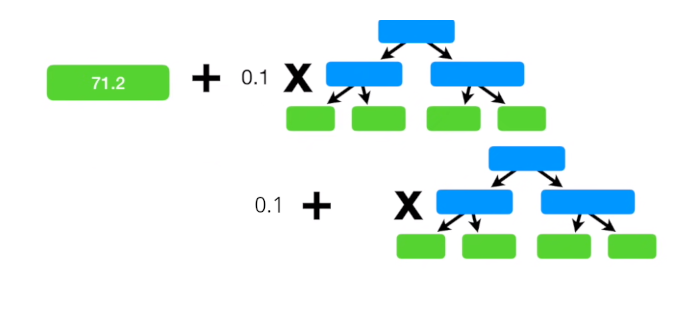

Процесс построения дерева можно продолжить. Он ограничивается максимальным количеством итераций (деревьев), которое можно задать при создании модели градиентного бустинга.

### Теперь погрузимся в математику

А именно про математику в шагах обучения. Для просоты уменьшим количество семплов в датасете до первых трех.
***
На вход модели подаются:
- данные в виде $\{(x_{i}, y_{i})\}^{n}_{i=1}$
- дифференцируемая функция потерь $L(y_{i}, F(x))$ для регрессии <br>
Где $n - количество данных, x_{i}$ - i-ый сэмпл из данных (строки, без таргета), $y_{i}$ - i-ый таргет. $F(x)$ - функция, дающая нам предскзания. <br>
Функции потерь существует огромное количество, самые простые и известные: MSE (Mean Squared Error), MAE (Mean Absolute Error), RMSE (Root Mean Squared Error). Для примера мы будем использовать функцию, похожую на MSE (для упрощения расчетов, вместо n в знаменателе будет стоять 2):
&emsp;$L(y_{i}, F(x)) = \sum \limits _{i=1} ^{n} \frac{(y_{i} - \hat{y_{i}})^2}{2}$, где $y_{i}$ - наши таргеты, $\hat{y_{i}}$ - предсказанные значения.
***
Шаг 1: Инициализация модели с помощью константной величины и вычисления ошибок (псевдо разностей из предыдущего пункта): <br>
$$F_{0}(x) = \textrm{argmin}_{\gamma} \sum \limits _{i=1} ^{n} L(y_{i}, \gamma)$$<br>
argmin - означает, что мы должны найти предсказываемое значение, которое минимизирует сумму. Для этих целей мы могли бы использовать градиентный спуск (способ нахождения глобального минимума функции), на прктике так и делается, но сейчас для простоты мы просто найдем производную от этой суммы, приравняем ее к нулю и решим уравение относительно $\gamma$. <br>
$-(88 - \hat{y_{1}}) - (76 - \hat{y_{2}}) - (56 - \hat{y_{3}}) = 0$, примем $\hat{y_{1}} = \hat{y_{2}} = \hat{y_{3}} = \gamma$ (мы можем так сделать т к в начале обучения у нас должен быть всегда один лист, т е всего одно значение которое должно предсказываться), тогда: $-(88 - \gamma) - (76 - \gamma) - (56 - \gamma) = 0$. Следовательно: $\gamma = 73.3$ (получили среднее значение всех таргетов в обучающей выборке, такое совпадение обусловлено выбором лосс функции).<br>
Таким образом наше констатное значение, инацилизирующее нашу модель (значение самого превого листа) равно 73.3.

Шаг 2 (Итерационный шаг): <br>
На данном шаге происходит создание и обучение ансамбля, состоящего из М деревьев. М - это гиперпараметр, который можно перебирать для нахождения модели градиентного бустинга, сходящейся лучше. На практике часто M = 100, но сейчас мы разберем для общего случая.
<br>
***
Часть A
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$r_{im} = - \Bigg[\frac{\partial L(y_{i}, F(x_{i}))}{\partial F(x_{i})}\Bigg]_{F(x)=F_{m-1}(x)}$ for i = 1,...,n
<br>
где $r_{im}$ (residual) - та самая псевдо разность из предыдущего пункта (i - номер сэмпла из датасета, m - номер дерева, которое мы пытаемся построить); $L(y_{i}, F(x_{i}))$ - наша лосс функция; $F(x_{i})$ - функция возвращающая предсказания (построенное дерево).

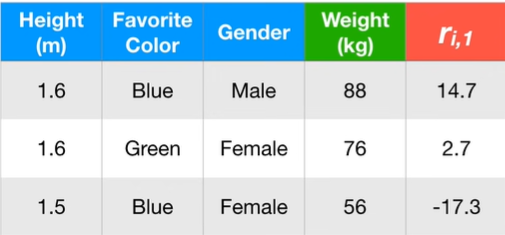

Часть B

Теперь на фичах и на новом таргете ($r_{i,1}$) построим и обучим новое дерево:
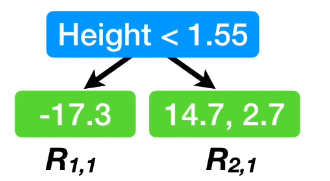
где $R_{jm}$ - конечные области дерева (листья дерева), j - индекс каждого листа в дереве, m - номер этого дерева.

Часть С

Для $j = 1...J_{m}$ (то есть для каждого листа) посчитаем $\gamma_{jm} = \underset{\gamma}{\textrm{argmin}} \sum \limits _{x_{i} \in R_{jm}} L(y_{i}, F_{m-1}(x_{i}) + \gamma)$ <br>
$\gamma_{11} = \underset{\gamma}{\textrm{argmin}} L(y_{3}, F_{m-1}(x_{3}) + \gamma) \rightarrow \gamma_{11} = \underset{\gamma}{\textrm{argmin}} \frac{(y_{3} - (F_{m-1}(x_{3}) + \gamma))^{2}}{2} \rightarrow \gamma_{11} = \underset{\gamma}{\textrm{argmin}} \frac{(56 - (73.3 + \gamma))^{2}}{2} \rightarrow \gamma_{11} = -17.3$ (argmin считаем таким же образом как в Шаге 1)
<br>
Таким же образом считаем $\gamma_{21}$
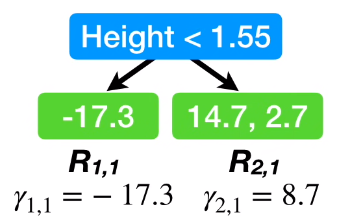
<br>
Часть D
<br>
Вычисляем наши предсказания: $F_{m} = F_{m-1}(x) + \alpha \sum \limits _{j=1}^{J_{m}} \gamma_{jm}I(x \in R_{jm})$ (сумма говорит о том, что нужно прибавить все такие значения гамма, что в соответствующих им листьях лежит сэмпл x; $\alpha$ - learning rate)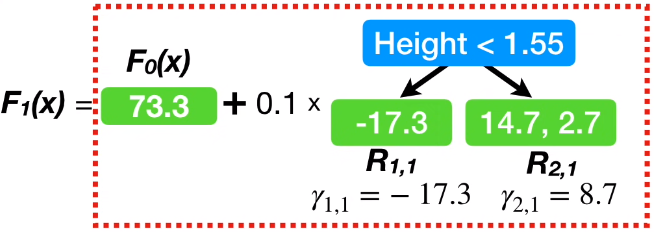
Если M = 2
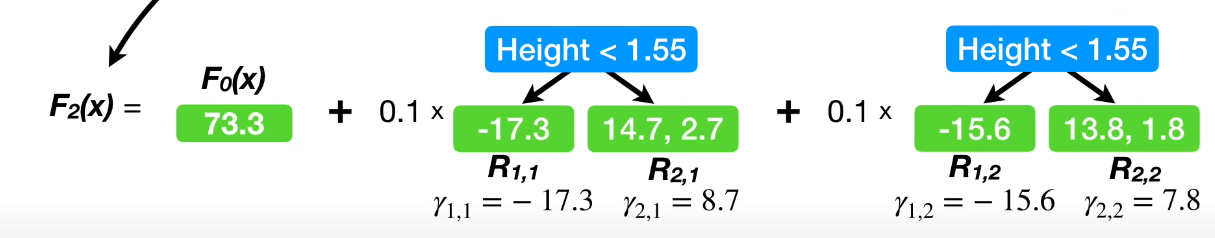

<br>
Далее весь процесс повторояется до тех пор, пока количество деревьев не окажется равным заранее заданному значению.

## Градиентный бустинг для задачи классификации

И снова сначала быстрый high level обзор, а потом погружение в математику за шагами обучения.<br>
Рассматривать градиентный бустинг при классификации будем на следующем маленьком примере.

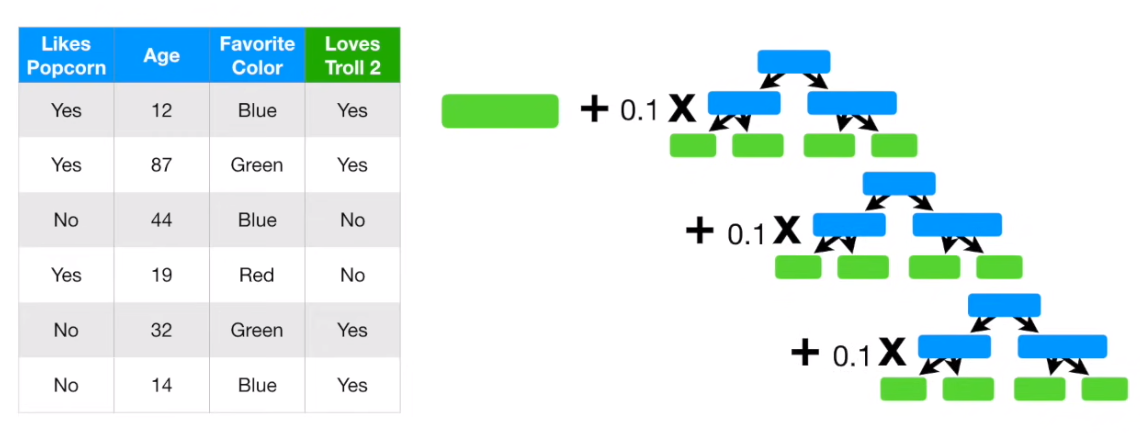

Так же, как и при регрессии, построение модели начинается с инициализации одного листа.<br>
***
(нужно сказать что такое log-шанса и log-правдоподобия)
Когда мы используем градиентный бустинг для классификации, предсказания выдаются нам в виде $log(\frac{p}{1-p})$ (log-шанса), где p - вероятность положительной метки класса. В данном случае $log(\frac{p}{1 - p}) = log(\frac{4}{2}) \approx 0.7$, так как положительных меток 4, а отрицатетльных - 2. Это значение, которое лежит в первом листе. Но как же его использовать в дальнейшем, для вычисления ошибки классификации? Самый простой путь - это превратить это значение в значение вероятности с помощью логистической функции: $p_{0} = \frac{e^{log(\frac{p}{1 - p})}}{1 + e^{log(\frac{p}{1 - p})}}$, где $p_{0}$ - вероятность. В нашем случае значение вероятности примерно равно 0.7. Пусть порогом является 0.5, тогда, так как 0.7 больше 0.5, то наша модель предсказывает только Yes.
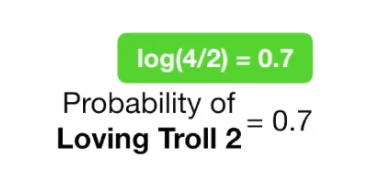

Теперь нам нужно вычислить то, насколько наша модель ошибается. Для этого примем значения Yes за 1, а No за 0. Тогда ошибка модели будет вычисляться вычитанием полученной вероятности из таргета.
<br>
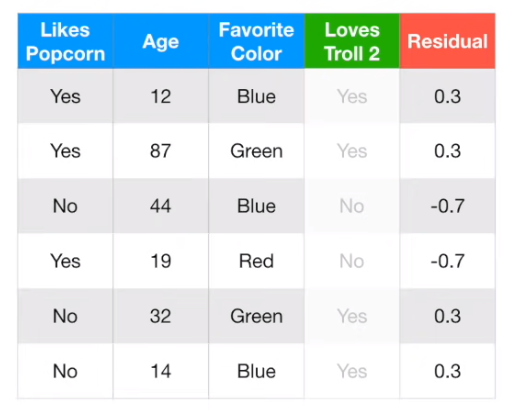

Теперь строим новое дерево, которое основываясь на фичах "Likes popcorn", "Age", "Favorite color", будет предсказывать "Residual". Другими словами, мы снова строим деревья, котоыре будут учиться на ошибках предыдущих деревьев.
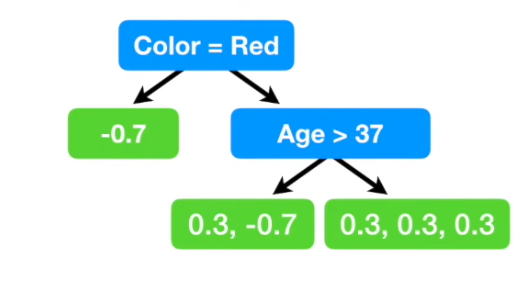
<br>
Так же, как и в случае с объяснением регрессии мы ограничим количество листьев в дереве до трех, опять же для простоты:) (на практике количество листьев ставят от 8 до 32)
***
Следует отметить, что в градиентном бустинге значение в листьях дерева равняется значению ошибки предсказания (разности вероятности), а значение в первоначальном листе - это логарифм. Нам нужно каким-то образом трансформировать ошибки предсказания. За эту трансоформацию отвечает формула: $\frac{\sum Residual_{i}}{Previous prob_{i} * (1 - Previous prob_{i})}$ <br>
Таким образом дерево принимает следующий вид: 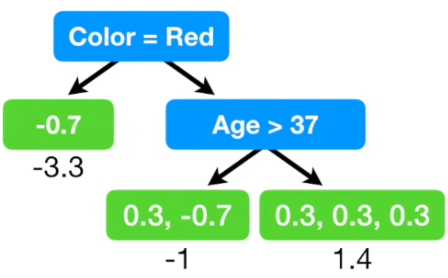
***
И теперь мы можем взять совокупность нашего дерева и начального листа: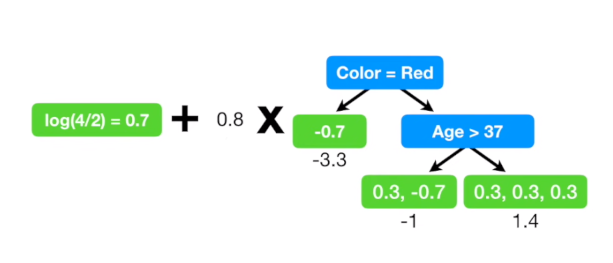
***
Теперь вычислим предсказание для какждого сэмпла из обучающей выборки и сразу же переведем из в вероятности с помощью логистической функции. Получим следующие результаты: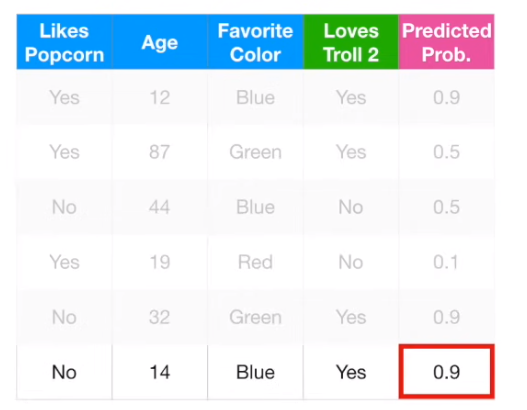
***
Далее вычислим новые ошибки, находя разность вероятностей:
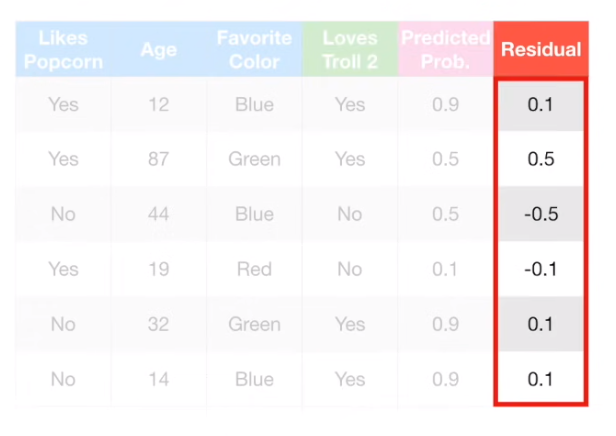
*** 
И строим новое дерево: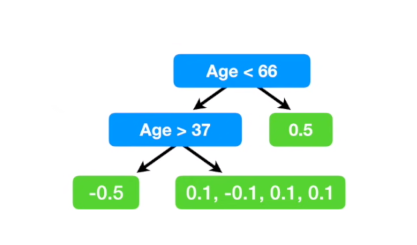
Вычисляем значения в листьях с помощью показанной ранее формулы и получем следующие результаты:
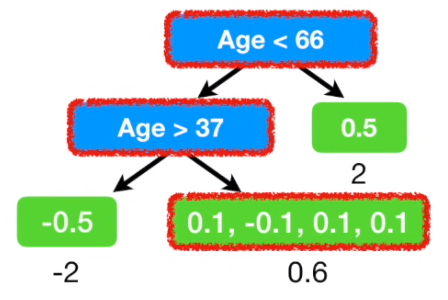
***
Теперь мы можем скомбинирвоать эту модель с предыдущими:
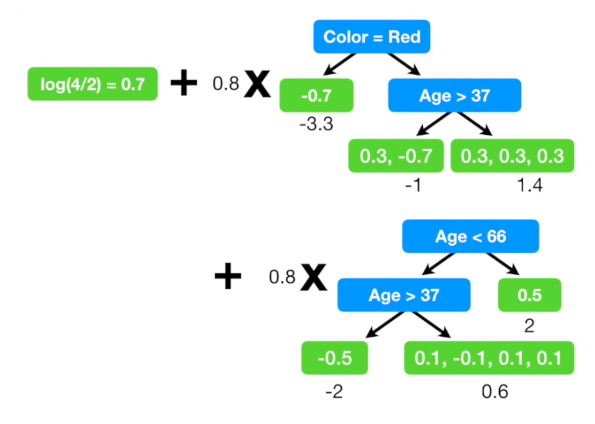
Таким образом можно продолжать строить градиентный бустинг до максимального количества деревеьев или до тех пор пока модель не обучиться достаточно хорошо.
***
Далее для предскзаний на новых данных, нужно просто пропустить их через модельку и применить логистическую функцию. В нашем случае, мы получим вероятность того, что человек любит фильм Troll 2.

### Математика за обучением градинетного бустинга для задачи классификации ( •̀ ω •́ )✧

Для просоты уменьшим количество семплов в датасете до первых трех. <br>
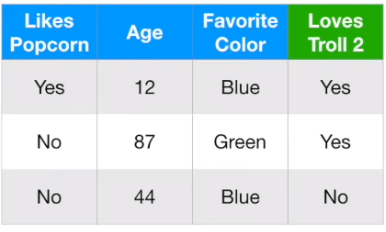
***
Так же, как и при рассмотернии регрессии, у нас будут следующие входные данные: <br>
- данные в виде $\{(x_{i}, y_{i})\}^{n}_{i=1}$
- дифференцируемая функция потерь $L(y_{i}, F(x))$ для классификации <br><br>
Где n - количество данных, $x_{i}$ - i-ый сэмпл из данных (строки, без таргета), $y_{i}$ - i-ый таргет. $F(x)$ - функция, дающая нам предскзания. <br>
Для того, чтобы легче было разбирать одну из самых распространенных лосс-функций для классификации, изобразим наши данные на графике, где синие точки обозначют количество людей, которым нравится фильм (вероятность = 1), красные показывают количество людей, которым не нравится фильм (вероятность = 0), пунктирная линия - предсказанная нашей моделью вероятность:
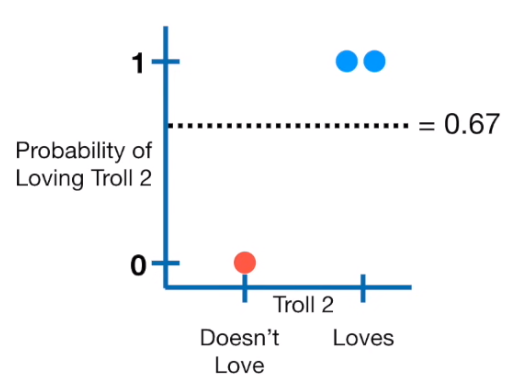
***
Чтобы понять, как же выглядит наша лосс-функция, попробуем вычислить log-правдоподобие нашей выборки используя вероятности по следующей формуле:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\sum \limits_{i=1}^N y_{i}*log(p) + (1 - y_{i})*log(1 - p)$ <br>
Где p - вероятность положительного класса (p = 0.67 при первой итреации).<br>
Для нашего маленького примера: log-likelihood $= log(0.67) + log(0.67) + log(1-0.67)$. Заметим, что, чем лучше модель предсказывает, тем больше становится log_likelihood (при логистической регрессии эта функция максимизируется). Чтобы превратить эту функицю в лосс-функцию добавим минус:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$-\sum \limits_{i=1}^N y_{i}*log(p) + (1 - y_{i})*log(1 - p)$ <br>
Преобразуем нашу функцию так, чтобы она зависела от $log(odds) = log(\frac {p}{1 - p})$ (логарифма шанса):<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$-\sum \limits_{i=1}^N y_{i}*log(odds) - log(1 - p)$ <br> Зачем мы делаем такие преобразования? Вспомним, что в листьях деревьев у нас должны содеражаться log(odds) (????????????????). Далее сделаем следующее преобразование: $log(1 - p) = log(1 - \frac {e^{log(odds)}}{1 + e^{log(odds)}}) = -log(1 + e^{log(odds)})$ <br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $-\sum \limits_{i=1}^N y_{i}*log(odds) + log(1 + e^{log(odds)})$ <br>
Таким образом, мы получили понятную нам лосс-функцию, которую можно с легкостью применять при обучении. Функция дифференцируема, после нахождения мы получаем производную вида: $\frac {e^{log(odds)}}{1 + e^{log(odds)}} - y_{i} = p - y_{i}$
***
Теперь, когда все входные данные стали нам ясны, мы можем перейти к шагам обучния градиетного бустинга в задаче классификации.<br>
***
***Шаг 1. Инициализация модели, созданием первого листа***<br>
Делается это по следующей формуле, похожей на ту, что была при регрессии: $F_{0}(x) = \textrm{argmin}_{\gamma} \sum \limits _{i=1} ^{n} L(y_{i}, \gamma)$, где $L(y_{i}, \gamma) = -\sum \limits_{i=1}^N y_{i}*log(odds) + log(1 + e^{log(odds)})$. <br>
Вычисляем для нашего примера: $F_{0} = log(\frac {2}{1}) = 0.69$ <br>
*** 
***Шаг 2. Построение новых деревьев***
Следующие подпункты будут повторяться до тех пор, пока не построится определенное количество деревьев (пусть это количество будет равняться M)<br>
    1)Вычислим псевдо-разности: $r_{i,m} = -\Bigg[\frac {\partial L(y_i, F(x_i))}{\partial F(x_i)}\Bigg]_{F(x)=F_{m-1}(x)} for \space i = 1,..,n$, где $L(y_i, F(x_i))$ - лосс функция, $F(x_i)$ - предскзания модели, m - номер дерева, который строится в данный момент. После некоторых пероборазований получим: $r_{i,m} = (y_{i} - \frac{e^{log(odds)}}{1 + e^{log(odds)}})$ (нужно отметить про маленьку приписку в формуле слева). Посчитаем псевдо-разности на нашем примере:
        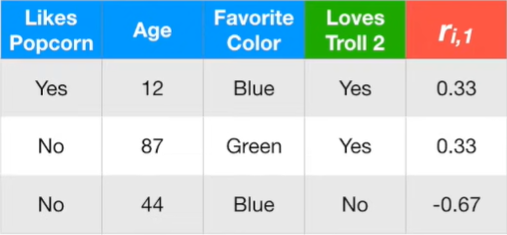<br>
    2) Построим дерево и обучим его на признаках и на новом таргете $r_{i,m}$: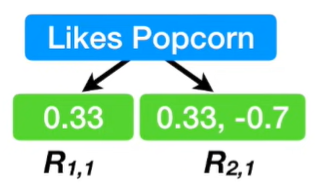<br>
    Пусть листься имеют обозначения $R_{j,m}$, где j - номер листа в текущем дереве, m - номер текущего дерева.<br>
    3) Пересчитаем значения в листьях (таким же образом, как и при регрессии): $\gamma_{j,m} = \underset{\gamma}{\textrm{argmin}} \sum \limits _{x_{i} \in R_{jm}} L(y_{i}, F_{m-1}(x_{i}) + \gamma)$ 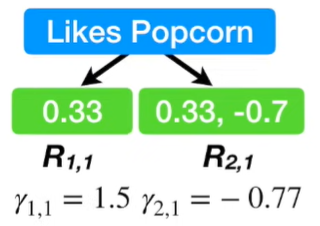<br>
    4) Предсказание для каждого сэмпла из обучающей выборки: $F_{m}(x) = F_{m-1}(x) + \nu \sum \limits _{j=1} ^{J_{m}}\gamma_{j,m}I(x \in R_{j,m})$
    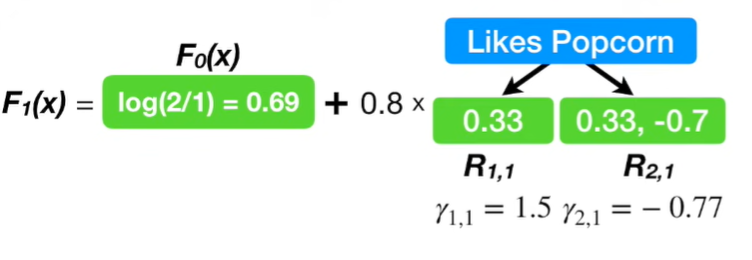
    
Далее шаг 2 можно повторять до тех пор, пока не будет построено тербуемого количества деревьев.
***
***Шаг 3. Предсказание на тестовых данных***<br>
Здесь мы просто "пропускаем" новый тестовый сэмпл на нашей построенной модели. Затем полоученные log(odds) преобразуем в вероятность с помощью формулы $p = \frac {e^{log(odds)}}{1 + e^{log(odds)}}$, смотрим по пороговому значению и выводим ответ "Yes" или "No".

## Самые изветсные библиотеки
Поговорим о том, какие крутые библиотеки, реализующие градиентный бустинг, существуют, слегка коснемся внутренностей этих библиотек, а так же рассмотрим разные интрументы-плюшки, которые предоставляются ими.

### XGBoost (Extrime gradient boost)
Данный алгоритм добавляет к ванильному градиентному бустингу такие плюшки, как новый метод построения деревьев (до этого деревья строились с помощью критейри Gini и Entropy), регуляризация, стрижка деревьев и различные методы оптимизации. Рассмотрим его работу при регрессии и при классификации.
***
***Новый метод построения деревьев решений***:<br>
При регрессии:<br>
1. Инициализация модели созданием одного листа, в котором лежит занчение 0.5 (вне зависимости от поставленной задачи).
2. Создание деревьев (существует множество разных способов, но мы рассмотрим самый распространенный метод):<br>
      - Конструируется дерево на основе признаков (так же как и в обычном градиентном бустинге или деревьях решений), например, если площадь квартиры больше 55 кв. м., то пойти по левой ветви, иначе по правой). 
      - Далее XGBoost использует новую метрику для построения - similarity score, который вычисляется для каждой вершины по формуле:<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$Similarity \space score = \frac {(\sum Residuals)^{2}} {N + \lambda}$, <br> где Residuals - разности с правильным таргетом, которые покрываются данной вершиной, N - количество разностей оказавшихся в данной вершине, $\lambda$ - параметр регуляризации, о котором мы поговорим позже. 
      - Затем для каждого родителя считается $GainValue = LeftSimilarity + RightSimilarity - RootSimilarity$. Эта величина показывает, насколько хорошей является разделение в текущем поддереве (чем больше GainValue, тем лучше разделение). 
      - Далее происходит стрижка дерева(tree pruning). Tree pruning начинается с последнего родителя. Происходит это следующим образом: используя заранее заданное нами значение $\gamma$ вычисляется разность $GainValue - \gamma$; если эта разность отрицательна, то мы удаляем текущую вершину дерева (вместе с ее детьми) - это означает, что разделение было неудачным и пытаться дальше отсюда строить ветви не имеет смысла, иначе все оставляем так же и пытаемся дальше строить наше дерево.
      - Таким образом, для постороения перебираются все возможные случаи попадания разностей в одну вершину. Выбирается тот случай (то дерево), при котором Gain Value максимален.
3. Передсказание в одном дереве считается по формуле: $Output\space value = \frac {\sum Residuals}{N + \lambda}$. А предсказание всей модели считается по следующей формуле: $Output\space of\space the\space model = Initial\space prediction + \nu \sum Outputs$, где $\nu$ - learning rate. <br>
Замечание: $\lambda$ - параметр L2 Regularization, помогающий уменьшать Similarity score для более легкой стрижки.

При классификации:<br>
1. Инициализация модели созданием одного листа, в котором лежит занчение 0.5 (вне зависимости от поставленной задачи) - в данном случае это вероятность. Сразу же трансформируем его в log(odds)
2. Создание деревьев происходит таким же образом, как это происходило при решении задачи регрессии. Отличие только в формуле для Similarity Score. При классификации он выглядит так: $Similarity \space score = \frac {{\sum Residuals}^{2}}{\sum [Previous\space Probability]*[1 - Previous \space Probability] + \lambda}$. Далее по тому же принципу, что и при регрессии, считается Gain value и проводится tree pruning.
3. Предсказания считаются при помощи логистической функции.
***
Также есть и другие плюшки в виде различных методов оптимизации(Approximate Greedy algorithm, parallel learning, weighted quantile sketch, spacity-aware split finding, cache-aware access, blocks for out-of-core computation), но мы не будет говорить о них, так как они помогают ускорить процесс обучения модели, а на результат пркатически не влияют.

### Light GBM
Это все еще такой же градиентный бустинг... Но быстрый, типа, оч быстрый. <br>
Как вы уже могли заметить, при построении модели самое большее количество времени занимает выбор наилучшего разделения. В XGBoost эта проблема немного решалась с помошью Approximate Greedy algorithm с использованием квантилей. Однако это неполное решение проблемы. При большом количестве обучающей выборки построение по прежнему занимает довольно много времени. Временная сложность алгоритма зависит от количества входных данных. Чтобы решить эти пролемы, LightGBM использует два метода GOSS(Gradient one-side sampling) и EFB(Exclusive feature building).<br>
Сразу отмечу, что временная сложность обучения обычного градентного бустинга равно O(n_features * n_samples)
***
- Gradient one-side sampling (Одно сторонняя выборка на основе градиента):<br>
Используется для выборки набора данных в LightGBM. GOSS присваивает точкам данных с большими градиентами при расчете усиления более высокий вес. В этом методе экземпляры, которые недостаточно использовались для обучения, вносят больший вклад. Точки данных с меньшими градиентами удаляются случайным образом, некоторые из них сохраняются для поддержания точности. Этот метод обычно лучше, чем случайная выборка, при той же частоте выборки. Таким образом, количество используемых данных уменьшается.
Подробнее можное прочитать в google.com
- Exclusive feature building (объединение взаимоисключающих признаков):<br>
Теперь если нам удасться уменьшить количество признаков, то можно добиться еще большего увеличения скорости обучения нашего алгоритма. <br>
Очень часто в данных есть признаки, которые не принимают одинаковых значений одновременно, например два признака не могут одновременно равняться нулю (допустим, такова природа наших данных). Подобные признаки называются взаимоисключающими. Так почему не объединять эти признаки в один признак, уменьшая их общее количество? Собственно этим и занимается LightGBM.
***
Таким образом, LightGBM, уменьшая количество фич и данных, добивается ускорения при обучении.